In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras import  utils # можно ко
from keras import  utils
from keras.datasets import imdb

In [19]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000) # это ограничение на 10000 слов которые чаще всего

In [20]:
x_train[9] # тут видно что тексты уже токенезировали

[1,
 14,
 20,
 47,
 111,
 439,
 3445,
 19,
 12,
 15,
 166,
 12,
 216,
 125,
 40,
 6,
 364,
 352,
 707,
 1187,
 39,
 294,
 11,
 22,
 396,
 13,
 28,
 8,
 202,
 12,
 1109,
 23,
 94,
 2,
 151,
 111,
 211,
 469,
 4,
 20,
 13,
 258,
 546,
 1104,
 7273,
 12,
 16,
 38,
 78,
 33,
 211,
 15,
 12,
 16,
 2849,
 63,
 93,
 12,
 6,
 253,
 106,
 10,
 10,
 48,
 335,
 267,
 18,
 6,
 364,
 1242,
 1179,
 20,
 19,
 6,
 1009,
 7,
 1987,
 189,
 5,
 6,
 8419,
 7,
 2723,
 2,
 95,
 1719,
 6,
 6035,
 7,
 3912,
 7144,
 49,
 369,
 120,
 5,
 28,
 49,
 253,
 10,
 10,
 13,
 1041,
 19,
 85,
 795,
 15,
 4,
 481,
 9,
 55,
 78,
 807,
 9,
 375,
 8,
 1167,
 8,
 794,
 76,
 7,
 4,
 58,
 5,
 4,
 816,
 9,
 243,
 7,
 43,
 50]

In [21]:
# это словарь индексов в котором можно найти слово которое чаще встречается
word_index = imdb.get_word_index()
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [22]:
# сделаем реверс словаря чтобы по индексу находить код

reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [23]:
reversed_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [24]:
# раскодируем рецензию
decode_review = ' '.join([reversed_word_index[i] for i in x_train[19]])
decode_review

"the exercise he it is tony falls ask has is found and sophie david order besides and it age cole watch extraordinary would it racist bad them can of order this community dancer of introduced for at does for all with released movies sometimes to for be war rock made all it coming all well fighting in cheap not his movie high and 1969 actors know bad can and chance 6 rave tendency 1974 in homicidal or weren't to and is got say room straightforward legend like that hand some it of looney br about help of you it is over are of straight able of their book an of details have stuff that in not that it her and anyone who so devil's down course sophie to straightforward for have big 3 not also global she this of played sophie there theatre will life are goes in still lion to would to straightforward he parsons who is success save br being before this television god is nobody to tony ask for into and to and have"

In [25]:
# переведем векторизацию текста отзвыва в оне хот

In [28]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [29]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [30]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [31]:
len(x_train[0])

10000

In [38]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(10000,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

2022-08-09 15:21:15.134031: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-09 15:21:15.134425: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-09 15:21:15.134470: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-09 15:21:15.134512: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-09 15:21:15.134552: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                160016    
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [43]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
textmodel = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20


2022-08-09 15:25:45.394722: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 900000000 exceeds 10% of free system memory.


176/176 [==============================] - 2s 6ms/step - loss: 0.3676 - accuracy: 0.8565 - val_loss: 0.2736 - val_accuracy: 0.8948
Epoch 2/20
176/176 [==============================] - 1s 4ms/step - loss: 0.2092 - accuracy: 0.9202 - val_loss: 0.2789 - val_accuracy: 0.8920
Epoch 3/20
176/176 [==============================] - 1s 4ms/step - loss: 0.1635 - accuracy: 0.9396 - val_loss: 0.3068 - val_accuracy: 0.8920
Epoch 4/20
176/176 [==============================] - 1s 4ms/step - loss: 0.1330 - accuracy: 0.9529 - val_loss: 0.3415 - val_accuracy: 0.8864
Epoch 5/20
176/176 [==============================] - 1s 4ms/step - loss: 0.1098 - accuracy: 0.9609 - val_loss: 0.4084 - val_accuracy: 0.8744
Epoch 6/20
176/176 [==============================] - 1s 5ms/step - loss: 0.0903 - accuracy: 0.9683 - val_loss: 0.4272 - val_accuracy: 0.8824
Epoch 7/20
176/176 [==============================] - 1s 6ms/step - loss: 0.0722 - accuracy: 0.9746 - val_loss: 0.4978 - val_accuracy: 0.8680
Epoch 8/20
176/17

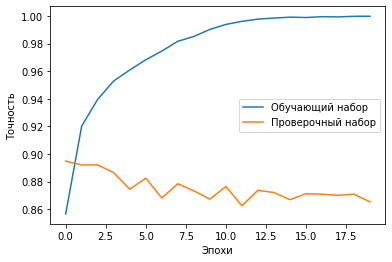

In [45]:
plt.plot(textmodel.history['accuracy'], label="Обучающий набор")
plt.plot(textmodel.history['val_accuracy'], label="Проверочный набор")
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

In [46]:
finalscore = model.evaluate(x_test, y_test)

120/782 [===>..........................] - ETA: 0s - loss: 1.9038 - accuracy: 0.8417

2022-08-09 15:29:52.626508: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 1s 1ms/step - loss: 1.9737 - accuracy: 0.8452
